<a href="https://colab.research.google.com/github/JuanJSMVM/ML_WineDataRL/blob/main/ML_Winedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right" width="300"
     height="300" hspace="5"><br><FONT FACE="Courier" SIZE=4>
> 
> **Regresión lineal: Gradiente descendente.**
> 
>**Autor:** Juan Manuel Vasquez Mejia
> *Asignatura:** Machine Learning en Computación Avanzada
> 
> **Docente:** John Corredor, PhD
>
> **Fecha:** 22/10/2021  
> 
> 
> 


# Implementación y información del dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
url = "https://raw.githubusercontent.com/corredor-john/universidadsergioarboleda/main/dataWineQuality.csv"

In [ ]:
df_WineNoNorm = pd.read_csv(url)

In [ ]:
df_WineNoNorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Datos estadisticos de cada una de las columnas.
df_WineNoNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
#Se revisa la información sobre los tipos de datos del dataframe
df_WineNoNorm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Visualización gráfica de los datos dispersión par por variables
# sns.pairplot(df_WineNoNorm)

In [ ]:
# Se presenta la matriz de correlación de las variables.
matrizCorrNoNorm = df_WineNoNorm.corr()
matrizCorrNoNorm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# División de variables independientes y variable dependiente (X, y)

Se divide el dataset según sus caracteristicas y la variable a predecir. En este caso, se va a determinar según las propiedas dadas del vino, su correspondiente calidad.

In [ ]:
X=df_WineNoNorm.drop(['quality'], axis=1)
y=df_WineNoNorm.quality

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

# Implementación de Regresión Lineal usando Sklearn.

## Implementación de regresión lineal.

In [ ]:
# División en datos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =560, test_size=0.2)

In [ ]:
modeloRL = LinearRegression()
modeloRL.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Se quiere imprimir los parámetros (pendiente, intercepto)
b=modeloRL.intercept_
m= modeloRL.coef_

print("\nIntercepto de la recta de mejor ajuste",round(b,3))


Intercepto de la recta de mejor ajuste 32.982


# Implementación de regresión lineal por el método de gradiente descendiente estocástico.

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X=scale(X)
y=scale(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =560, test_size=0.2)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgdr = SGDRegressor(alpha=0.01,verbose=1)

## Función de costo.

In [ ]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Iteraciones")
    plt.title("Funcion de costo")
    plt.ylabel("Perdida")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

=============== Loss Array ===============
[0.350737 0.333697 0.332673 0.332785 0.332089 0.33088  0.331758 0.331115
 0.331143 0.331257 0.330794]


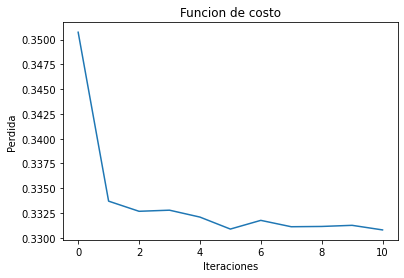

In [ ]:
with DisplayLossCurve(print_loss=True):
  sgdr.fit(X_train, y_train)

In [ ]:
m1= sgdr.coef_
b=sgdr.intercept_

print("\nIntercepto de la recta de mejor ajuste",b)


Intercepto de la recta de mejor ajuste [0.01409922]


# Verificación de coeficientes.

In [ ]:
print("Coeficientes de las variables independientes(Regresión lineal): \n")
for i in m:
  print(i)

Coeficientes de las variables independientes(Regresión lineal): 

0.03946025840181773
-1.135098666240585
-0.25637728304994284
0.02914355122774801
-1.938064917938235
0.003398082733259533
-0.002667331546959195
-28.945478155623338
-0.4591536535244136
0.9064535077791502
0.2828157036155126


In [ ]:
print("Coeficientes de las variables independientes(SGD Regresión lineal): \n")
for i in m1:
  print(i)

Coeficientes de las variables independientes(SGD Regresión lineal): 

0.08521679598712201
-0.23596110102375173
-0.06010465264647002
0.04747396611683606
-0.11042410089646044
0.039940155026442783
-0.11257486868073178
-0.0861057781409878
-0.07084218673359638
0.1879967366038902
0.3635400411464565


<b> Coeficientes de variables independientes (QT)</b>
<br>
<img src="https://drive.google.com/uc?export=view&id=1wV2-LHYZ6YSVfEnMvkrpEQ9FoCDjjcvU" align="top">

<b> Costo (QT)</b>
<br>
<img src="https://drive.google.com/uc?export=view&id=1IS0ZDIJBjNG1xUgTBU1k3A5pFpw22HoG" align="left">
<img src="https://drive.google.com/uc?export=view&id=1mmu9hHfOzXio3d8NMPItr5GFvJeE5P6a" align="bottom">